## This script contains:

##### Import analysis libraries
##### Import 'customers' and 'ords_prods' df's
##### Bar chart
##### Histogramn
##### Scaterplot
##### Line chart
##### Create a histogram of the 'order_hour_of_day' column
##### Create a bar chart from the 'loyalty_flag' column
##### Check whether there's a difference in expenditure (the 'prices' column) depending on the hour of the day
##### Create a line chart exploring the connections between age and number of dependents
##### Create a scatterplot to explore whether there’s a connection between age and spending power (income)
##### Export visualizations as '.png' files in the relevant project folder
##### Count rows

### Import analysis libraries

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### Import 'ords_prods' df

In [3]:
# Import data sets using the path as string
path = r'C:\Users\loren\Desktop\Career Foundry\2. Data Immersion Course\A4 Python Fundamentals for Data Analysts\07-2023 Instacart Basket Analysis'
ords_prods = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products.pkl'))

In [4]:
# Changing data type on 'prices' variable to address issue with the blue line on the line chart 

ords_prods['prices'] = ords_prods['prices'].astype('float32').round(2)

### Bar chart

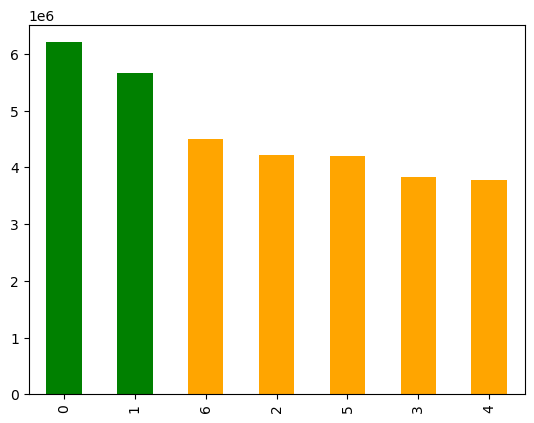

In [5]:
# Creating a bar chart
bar = ords_prods['orders_day_of_week'].value_counts().plot.bar(color=['green', 'green', 'orange', 'orange', 'orange', 'orange', 'orange'])

### Histogramn

In [6]:
# Creating a histogram
histogram = ords_prods['prices'].plot.hist(bins = 25)
# 'ValueError: autodetected range of [1.0, inf] is not finite' is addressed when I handle the values > $100

ValueError: autodetected range of [1.0, inf] is not finite

In [ ]:
# Investigating 'prices'
ords_prods.describe()

In [ ]:
# Checking max value on 'prices'
ords_prods['prices'].max()
# Before was $99.999. After impute NaN on products that costs over than $100, the max is $25

In [7]:
# Imputing NaN on products that costs over than $100
ords_prods.loc[ords_prods['prices'] >100, 'prices'] = np.nan

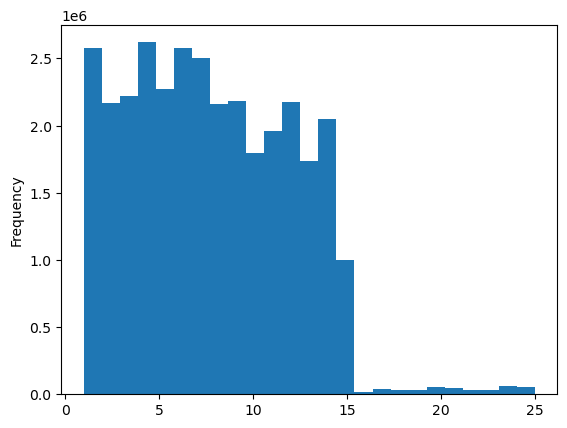

In [8]:
# Creating a histogram after 
hist = ords_prods['prices'].plot.hist(bins = 25)

### Scaterplot

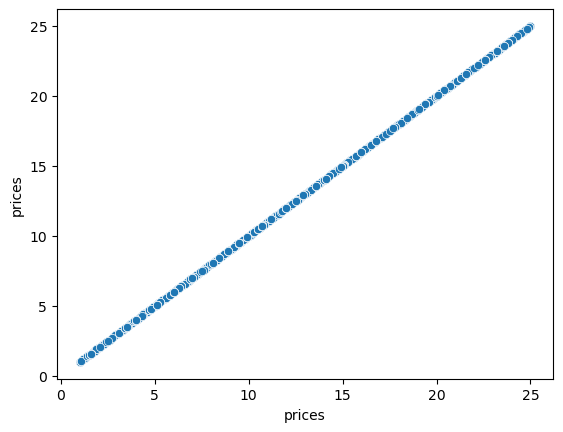

In [9]:
# Creating a scatterplot
scat = sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods)

### Line chart

In [10]:
# Creating an accurate sample for the line chart
np.random.seed(4)

In [11]:
# Creating a list holding True/False to the test np.random.rant() <= 0.7
dev = np.random.rand(len(ords_prods)) <= 0.7

In [12]:
# Store 70% of the sample in the dataframe big
big = ords_prods[dev]

In [13]:
# Store 30% of the sample in the dataframe small
small = ords_prods[~dev]

In [14]:
# Creating subset that contains only the 'prices' and 'orders_day_of_week' variables
df_2 = small[['orders_day_of_week','prices']]

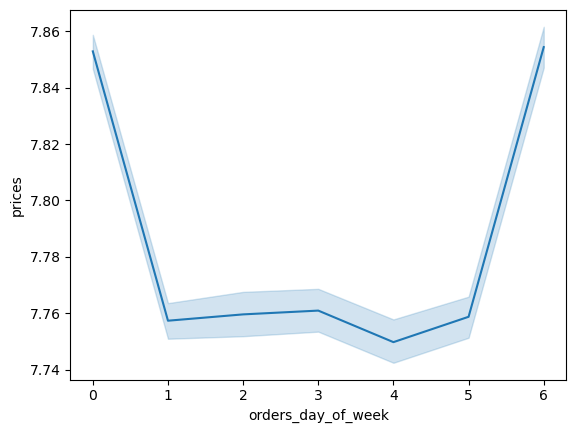

In [15]:
# Creating a line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

### Create a histogram of the 'order_hour_of_day' column

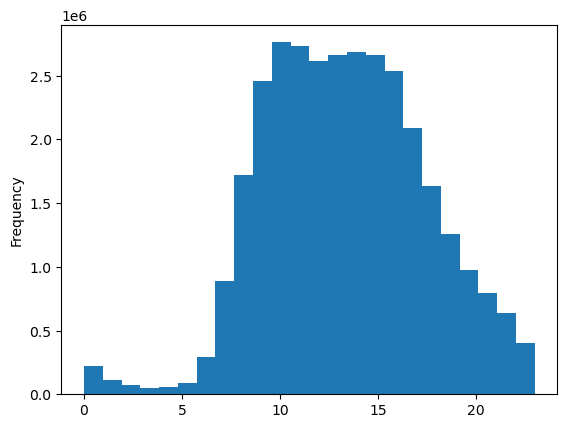

In [16]:
# Creating a histogram
hist_2 = ords_prods['order_hour_of_day'].plot.hist(bins = 24)

> Peak hours when most of the orders are made are 10am - 3pm. From there, it keeps decreseasing continuosly until 5am. From 5am until the peak hour (10am) starts again, there is a constant growth by hour

### Create a bar chart from the 'loyalty_flag' column

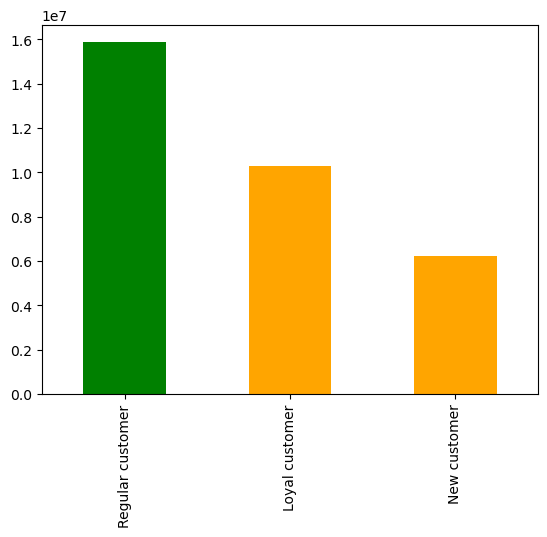

In [17]:
# Creating a bar chart
bar_2 = ords_prods['loyalty_flag'].value_counts().plot.bar(color=['green', 'orange', 'orange'])

### Check whether there's a difference in expenditure (the 'prices' column) depending on the hour of the day

In [8]:
# Creating an accurate sample for the line chart
np.random.seed(4)

In [9]:
# Creating a list holding True/False to the test np.random.rant() <= 0.7
dev = np.random.rand(len(ords_prods)) <= 0.7

In [10]:
# Store 70% of the sample in the dataframe big
big = ords_prods[dev]

In [11]:
# Store 30% of the sample in the dataframe small
small = ords_prods[~dev]

In [12]:
# Creating subset
df_3 = small[['orders_day_of_week', 'prices']]

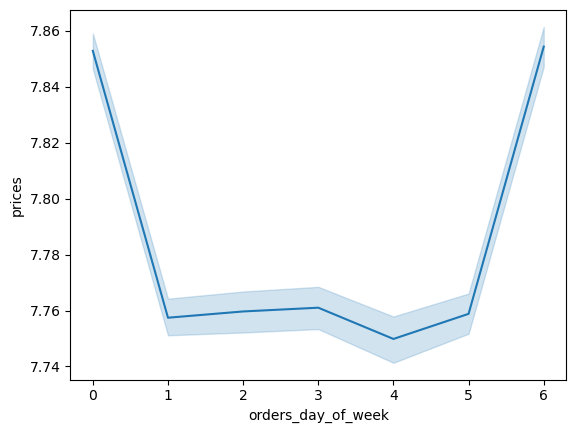

In [23]:
# Creating line chart
line_2 = sns.lineplot(data = df_3, x = 'orders_day_of_week', y = 'prices')

### Create a line chart exploring the connections between age and number of dependents

In [24]:
# Creating subset
df_4 = small[['age', 'dependants']]

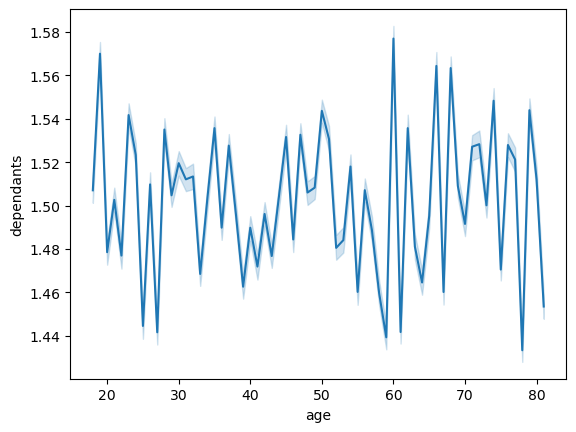

In [25]:
# Creating line chart
line_3 = sns.lineplot(data = df_4, x = 'age', y = 'dependants')

> I could not identify a relation between age and number of dependants

### Create a scatterplot to explore whether there’s a connection between age and spending power (income)

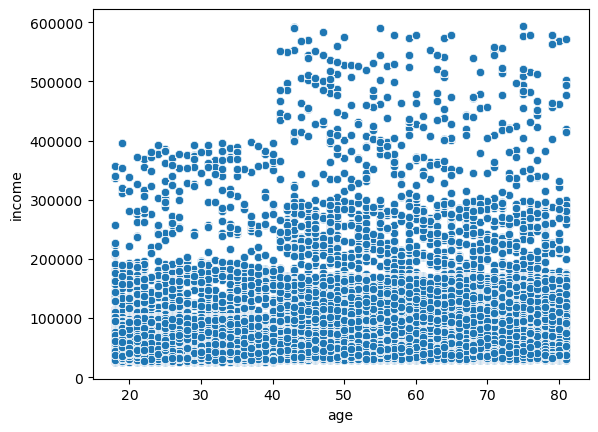

In [26]:
# Creating a scatterplot
scat_2 = sns.scatterplot(x = 'age', y = 'income',data = ords_prods)

> Most of the customers of all ages has an income up to 20k. We have a considerable number of customers of 40-80 years old receiving between 20-30k and some others receiving between 30-60k. It´s clearly demostrated there is no customer up to 40 years old with aan income more than 40k yearly.

### Export visualizations as '.png' files in the relevant project folder

In [27]:
# Exporting bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

In [28]:
# Exporting histogram
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

In [29]:
# Exporting scatterplot
scat.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scat_prices.png'))

In [ ]:
# Exporting line chart
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_dow_prices.png'))

In [ ]:
# Exporting histogram
hist_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_orders_dow.png'))

In [ ]:
# Exporting bar chart
bar_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_flag.png'))

In [ ]:
# Exporting line chart
line_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_prices_orders_dow.png'))

In [ ]:
# Exporting line chart
line_3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_dependants.png'))

In [ ]:
# Exporting scatterplot
scat_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scat_age_income.png'))

### Count rows

In [4]:
# To fill on my final report
ords_prods.shape

(32404859, 34)

> From here, I will work with a sample (30%) dataframe due RAM usage issues

In [13]:
# Creating a sample (30%) with all relevant variables
df_sample = small[['order_id', 'user_id', 'orders_day_of_week', 'order_hour_of_day',
                   'days_since_prior_order', 'product_id', 'add_to_cart_order', 'reordered', 'product_name',
                   'aisle_id', 'department_id', 'prices', 'price_range_loc', 'busiest_day',
                   'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag', 'avg_price',
                   'spending_flag', 'regularity', 'frequency_flag', 'gender', 'state', 'age', 'date_joined',
                   'dependants', 'status', 'income']]

In [14]:
# Exporting dataframe
df_sample.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_sample.pkl'))